## statsmodels Ordinary Least Squares (OLS) demonstration
source: https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html

In [1]:
# install
!conda install -c conda-forge statsmodels

Solving environment: done

# All requested packages already installed.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
plt.style.use('fivethirtyeight')

np.random.seed(1)

### Make a design matrix $X$ (our predictors)

In [4]:
nsample = 101
x = np.linspace(0, 10, nsample)
X = np.column_stack((x, x**2))

In [5]:
# see first 10 rows
X[:10]

array([[0.  , 0.  ],
       [0.1 , 0.01],
       [0.2 , 0.04],
       [0.3 , 0.09],
       [0.4 , 0.16],
       [0.5 , 0.25],
       [0.6 , 0.36],
       [0.7 , 0.49],
       [0.8 , 0.64],
       [0.9 , 0.81]])

In [6]:
# if you want your fit to have an intercept, you need to add a columns of 1s
X = sm.add_constant(X)

In [7]:
# see first 10 rows
X[:10]

array([[1.  , 0.  , 0.  ],
       [1.  , 0.1 , 0.01],
       [1.  , 0.2 , 0.04],
       [1.  , 0.3 , 0.09],
       [1.  , 0.4 , 0.16],
       [1.  , 0.5 , 0.25],
       [1.  , 0.6 , 0.36],
       [1.  , 0.7 , 0.49],
       [1.  , 0.8 , 0.64],
       [1.  , 0.9 , 0.81]])

### Make a true y using true betas
Goal is to predict these betas later

In [8]:
beta_B0 = 2 # intercept (column of 1s)
beta_B1 = 1 # column associated with linearly increasing value of x
beta_B2 = 0.5 # column associated with squared value of x
betas = np.array([beta_B0, beta_B1, beta_B2]).reshape(-1,1)
betas

array([[2. ],
       [1. ],
       [0.5]])

In [9]:
y = np.dot(X,betas)
print(y.shape)

(101, 1)


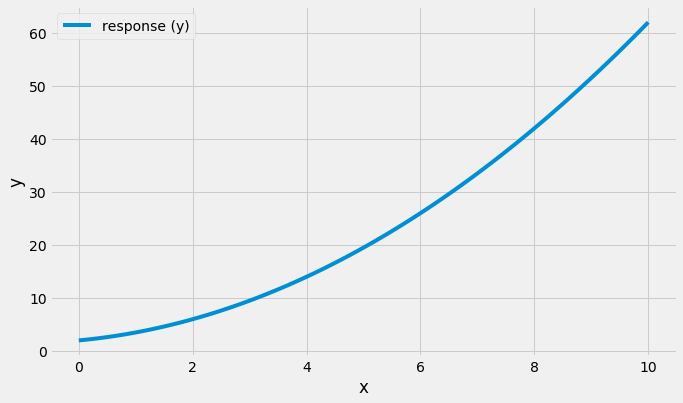

In [10]:
# plot it (y vs x, not x2)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(X[:,1], y, label='response (y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend();

In [11]:
# make some noise for the response
e = np.random.normal(size=nsample).reshape(-1,1)

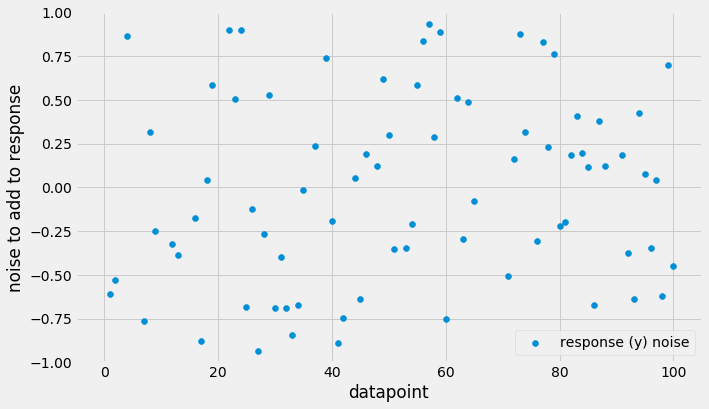

In [12]:
# plot the noise
dps = np.arange(nsample) # x values
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.scatter(dps, e, label='response (y) noise')
ax.set_ylim(-1,1)
ax.set_xlabel('datapoint')
ax.set_ylabel('noise to add to response')
ax.legend();

In [13]:
# real life data almost always has some noise in it
y_true = y + e

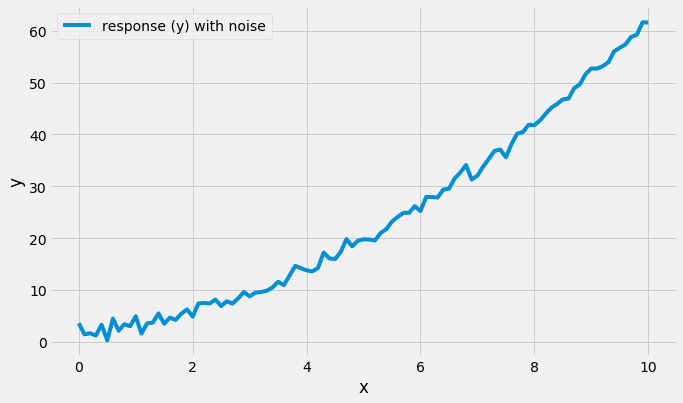

In [14]:
# plot it (y vs x, not x2)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(X[:,1], y_true, label='response (y) with noise')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend();

## Now perform OLS to determine the betas (coefficients)

In [15]:
model = sm.OLS(y_true, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.067e+04
Date:                Tue, 14 Jan 2020   Prob (F-statistic):          2.06e-129
Time:                        08:02:43   Log-Likelihood:                -129.81
No. Observations:                 101   AIC:                             265.6
Df Residuals:                      98   BIC:                             273.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7467      0.260      6.719      0.0

In [16]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [1.74674056 1.12731002 0.49021688]
R2:  0.997635355049163


In [17]:
# with fewer digits
n_digits_after_decimal = 3
print('Paramaters:')
for i, p in enumerate(results.params):
    p = round(p, n_digits_after_decimal)
    print(f'Beta{i}: {p}')

Paramaters:
Beta0: 1.747
Beta1: 1.127
Beta2: 0.49


In [18]:
# recall true betas
betas

array([[2. ],
       [1. ],
       [0.5]])

In [19]:
# plot predictions of model 
y_p = np.dot(X, results.params.reshape(-1,1))

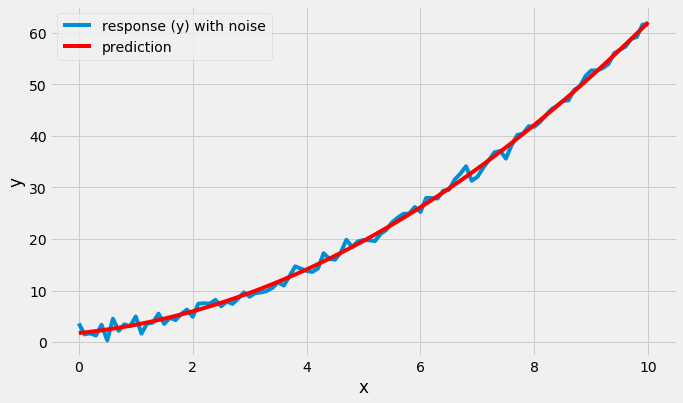

In [20]:
# plot it (y vs x, not x2)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(X[:,1], y_true, label='response (y) with noise')
ax.plot(X[:,1], y_p, c='r',label='prediction')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend();

### Now let's stack a non-informative column on to $X$

In [21]:
column_noninform = 3 * np.random.normal(size=nsample).reshape(-1,1)

In [22]:
X_with_noninform = np.hstack([X, column_noninform])

In [23]:
X_with_noninform[:10]

array([[ 1.        ,  0.        ,  0.        ,  3.67352311],
       [ 1.        ,  0.1       ,  0.01      ,  1.21047493],
       [ 1.        ,  0.2       ,  0.04      ,  1.78073557],
       [ 1.        ,  0.3       ,  0.09      , -3.28473554],
       [ 1.        ,  0.4       ,  0.16      ,  0.5081473 ],
       [ 1.        ,  0.5       ,  0.25      ,  2.22166935],
       [ 1.        ,  0.6       ,  0.36      , -2.86110181],
       [ 1.        ,  0.7       ,  0.49      , -0.79865552],
       [ 1.        ,  0.8       ,  0.64      ,  0.09784364],
       [ 1.        ,  0.9       ,  0.81      , -4.11935196]])

In [24]:
model_with_noninform = sm.OLS(y_true, X_with_noninform)
results_with_noninform = model_with_noninform.fit()
print(results_with_noninform.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.384e+04
Date:                Tue, 14 Jan 2020   Prob (F-statistic):          1.67e-127
Time:                        08:02:43   Log-Likelihood:                -129.08
No. Observations:                 101   AIC:                             266.2
Df Residuals:                      97   BIC:                             276.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7529      0.259      6.756      0.0